In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from matplotlib.cm import get_cmap

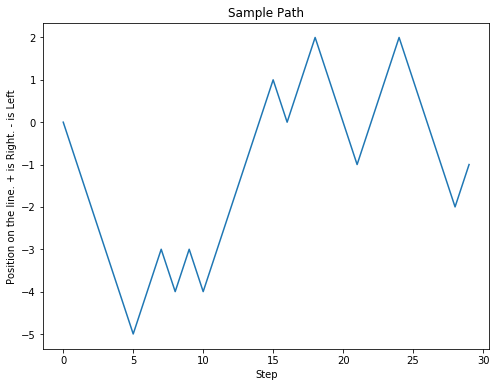

In [10]:
x=0
positions = [0]
for i in range(1,30):
    if rd.random() < 0.6:
        x+=1
    else:
        x-=1
    positions.append(x)

plt.figure(figsize=(8,6))
plt.plot(list(range(30)),positions)
plt.xlabel('Step')
plt.ylabel('Position on the line. + is Right. - is Left')
plt.title('Sample Path')
plt.show()

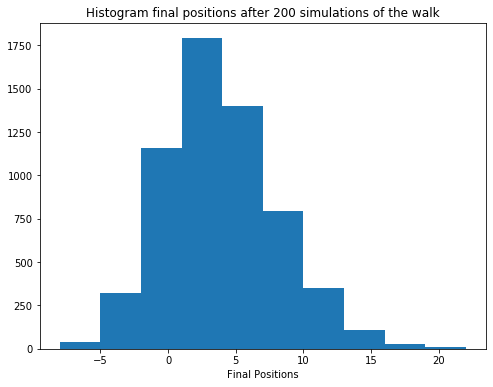

Mean = 3.3733333333333335
Variance = 17.421955555555556


In [14]:
final_positions = []
for j in range(200):
    x = 0
    for i in range(30):
        if rd.random() < 0.6:
            x+=1
        else:
            x-=1
        final_positions.append(x)

plt.figure(figsize=(8,6))
plt.hist(final_positions)
plt.xlabel('Final Positions')
plt.title('Histogram final positions after 200 simulations of the walk')
plt.show()
print('Mean = {}'.format(np.mean(final_positions)))
print('Variance = {}'.format(np.var(final_positions)))

The mean should be (0.6-0.4)30 = 6. 

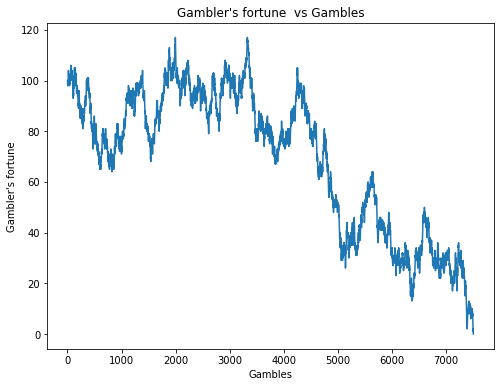

In [19]:
i=0
R=[100]
while R[i] > 0 and R[i] < 2100:
    i+=1
    W = int(rd.random() < 0.5)
    W = 2*W-1
    R.append(R[-1]+W)

plt.figure(figsize=(8,6))
plt.plot(list(range(len(R))),R)
plt.ylabel("Gambler's fortune")
plt.xlabel("Gambles")
plt.title("Gambler's fortune  vs Gambles")
plt.show()

In [39]:
def hist_gambles(sims = 20, upper_bound = 2000000, plot_hist = True):
    T = []
    for j in range(sims):
        i = 0
        R = [100]
        while R[i] > 0 and R[i] < 2100 and i < upper_bound:
            i+=1
            W = int(rd.random() < 0.5)
            W = 2*W-1
            R.append(R[-1]+W)
        T.append(i)
    
    if plot_hist:
        plt.figure(figsize=(8,6))
        plt.hist(T, label = "Gambles until bankruptcy (Upper bound = {})".format(upper_bound))
        plt.legend()
        plt.show()

    return T
    

In [77]:
Ts  = []
UBs = np.linspace(200000,1000000,10)
for UB in UBs:
    Ts.append(hist_gambles(100,UB,False))

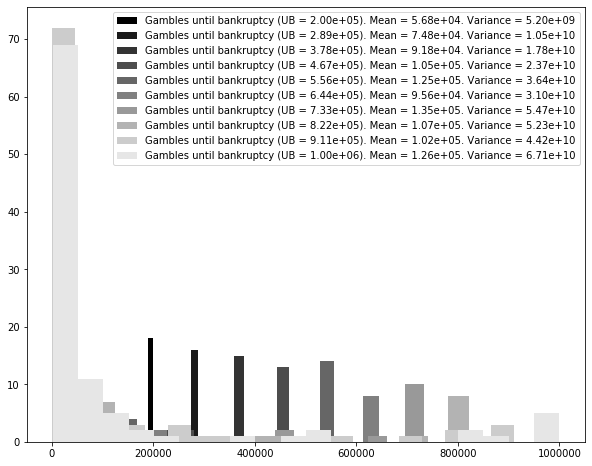

In [82]:
name = "Greys"
cmap = get_cmap(name)  # type: matplotlib.colors.ListedColormap # type: list

plt.figure(figsize=(10,8))
for i in range(len(Ts)):
    plt.hist(Ts[i], alpha = 1, 
             label = "Gambles until bankruptcy (UB = {}). Mean = {}. Variance = {}".format("{:.2e}".format(UBs[i]),"{:.2e}".format(np.mean(Ts[i])),"{:.2e}".format(np.var(Ts[i]))), 
             bins =20, color = [i/len(Ts),i/len(Ts),i/len(Ts)])

plt.legend()
plt.show()

The upper bounds bias the Mean by not letting extreme outcomes to happen by chance. If we set an upper bound, we no longer allow for situation in which the gambler "survived" for a very long time. If we allow this to happen, then these extreme outcomes are going to affect the mean very significantly, they will have a very heavy weight on it and make it larger. As we can see, the smaller the upper bound, the smaller the mean is. For small upper bounds, we get a lot of the events reaching this upper bound, and so the histograms show tall bars at the upper bound.